In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn.datasets as datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
images, target = datasets.load_digits(return_X_y=True)

In [3]:
print(images.shape, target.shape)

(1797, 64) (1797,)


In [4]:
def least_confident_sampling(proba):
    """Input must be of shape (n_samples, n_classes=2)"""
    cls = proba.max(axis=1)
    least_confident = cls.argmin()
    return least_confident

In [11]:
pool1 = images[target==1,:]
pool8 = images[target==8,:]
print(pool1.shape, pool8.shape)

(182, 64) (174, 64)


In [14]:
pool = np.zeros((pool1.shape[0]+pool8.shape[0], 64))
pool[:pool1.shape[0],:] = pool1
pool[pool1.shape[0]:,:] = pool8
trgt = np.zeros((pool.shape[0]))
trgt[:pool1.shape[0]] = 1
trgt[pool1.shape[0]:] = 8


clf_ref = svm.SVC(C=1, kernel='rbf', probability=False)
clf_ref.fit(pool, trgt)
acc_ref = accuracy_score(trgt, clf_ref.predict(pool), normalize=True)
print(acc_ref)


n_samples = pool.shape[0]
n_samples_init = 12
samples_init_idx = np.random.choice(np.arange(n_samples), size=n_samples_init)

train_set = pool[samples_init_idx,:]
train_lab = trgt[samples_init_idx]
lab_0_idx = train_lab == 0
lab_1_idx = train_lab == 1
initial_label_0 = lab_0_idx
initial_label_1 = lab_1_idx
initial_samples = train_set
mask = np.ones((n_samples,)).astype(np.bool)

for i in samples_init_idx:
    mask[i] = False
pool = pool[mask,:] #removing the now labeled samples
trgt= trgt[mask] #Idem

clf = svm.SVC(C=1, kernel='rbf', probability=True)
clf.fit(train_set, train_lab)
acc = accuracy_score(trgt, clf.predict(pool), normalize=True)
sampling_strat = least_confident_sampling

while acc_ref-.005 >= acc:
    # Selecting a new sample
    new_sample_idx = sampling_strat(clf.predict_proba(pool))
    new_sample = pool[new_sample_idx,:]
    new_label = trgt[new_sample_idx]
    # Adding new sample to training set
    tmp_set = np.append(train_set, np.array([new_sample]), axis=0)
    tmp_lab = np.append(train_lab, new_label)
    del(train_set); del(train_lab)
    train_set = tmp_set
    train_lab = tmp_lab
    del(tmp_set); del(tmp_lab)
    lab_0_idx = train_lab == 0
    lab_1_idx = train_lab == 1
    # Removing new sample from the pool
    mask = np.ones(pool.shape[0]).astype(np.bool)
    mask[new_sample_idx] = False
    pool = pool[mask,:]
    trgt = trgt[mask]
    clf.fit(train_set, train_lab)
    acc = accuracy_score(trgt, clf.predict(pool), normalize=True)


print("RESULT:")
print(pool.shape, train_set.shape)
queries = train_set[n_samples_init:,:]
queries_l = train_lab[n_samples_init:]
queries_l_0 = queries_l == 0
queries_l_1 = queries_l == 1




0.9943820224719101
RESULT:
(318, 64) (38, 64)


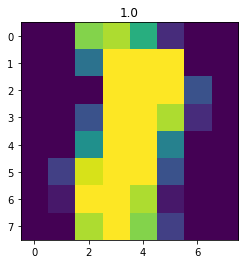

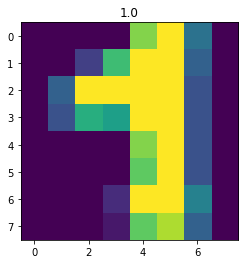

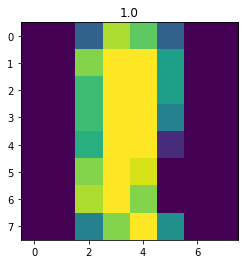

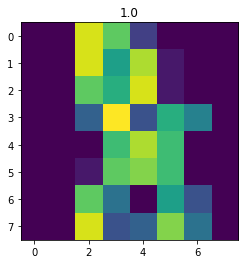

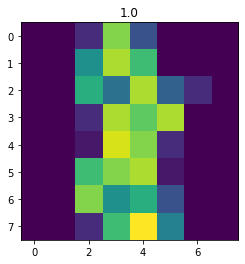

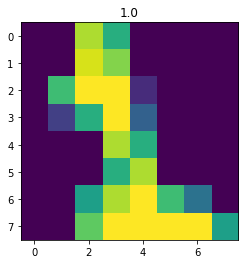

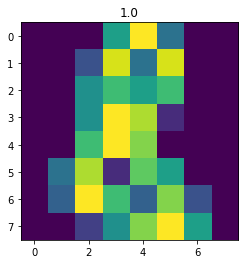

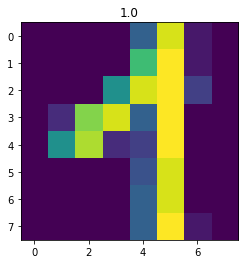

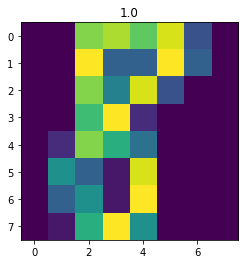

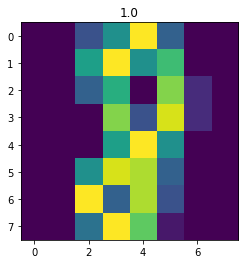

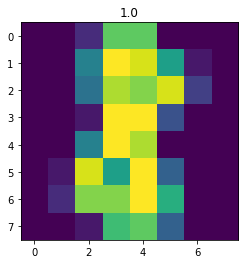

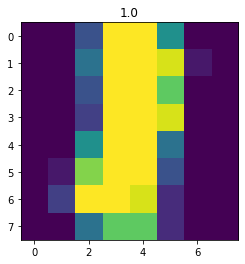

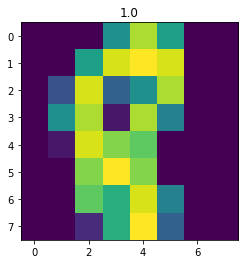

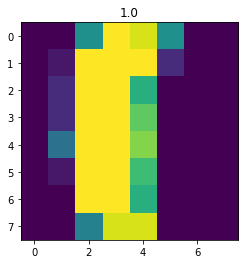

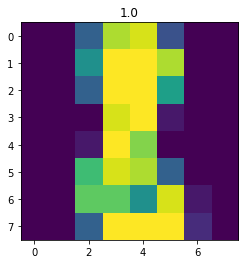

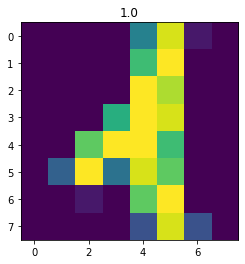

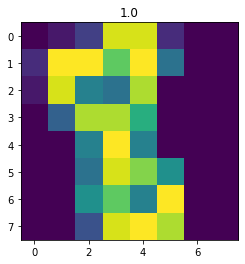

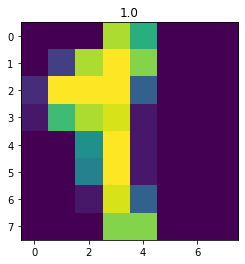

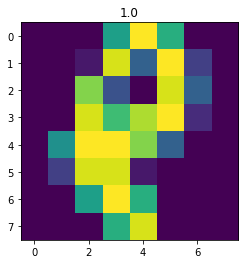

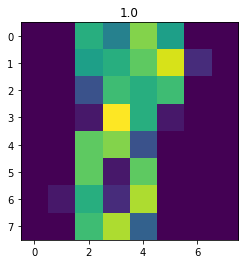

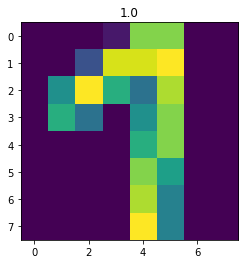

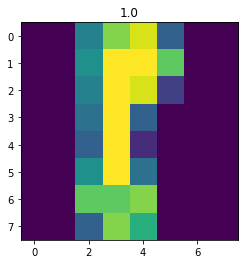

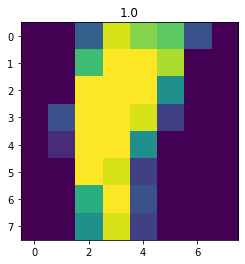

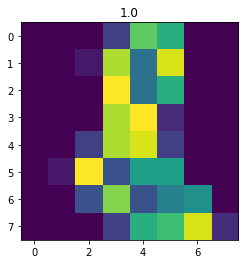

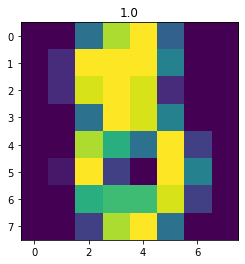

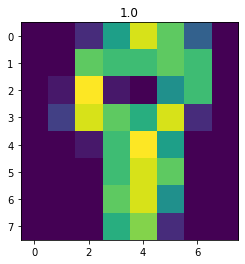

In [16]:
for i in range(queries.shape[0]):
    plt.figure()
    plt.imshow(queries[i].reshape(8,8))
    plt.title(str(trgt[i]))
    plt.show()

In [27]:
pool1 = images[target == 3,:]
pool2a = images[target == 2,:]
pool2b = images[target == 9,:]

l1 = pool1.shape[0]
l2 = pool2a.shape[0] // 2
l3 = pool2b.shape[0] // 2

pool = np.zeros((l1+l2+l3, 64))
pool[:l1,:] = pool1
pool[l1:l1+l2,:] = pool2a[:l2]
pool[l1+l2:,:] = pool2b[:l3]

trgt = np.zeros((l1+l2+l3))
trgt[:l1] = 1
trgt[l1:] = 2

x_train, x_valid, y_train, y_valid = train_test_split(pool, trgt, shuffle=True, test_size=0.2)


clf_ref = svm.SVC(C=1, kernel='linear', probability=False)
clf_ref.fit(x_train, y_train)
acc_ref = accuracy_score(y_valid, clf_ref.predict(x_valid), normalize=True)
print(acc_ref)


n_samples = pool.shape[0]
n_samples_init = 8
samples_init_idx = np.random.choice(np.arange(n_samples), size=n_samples_init)

train_set = pool[samples_init_idx,:]
train_lab = trgt[samples_init_idx]
lab_0_idx = train_lab == 0
lab_1_idx = train_lab == 1
initial_label_0 = lab_0_idx
initial_label_1 = lab_1_idx
initial_samples = train_set
mask = np.ones((n_samples,)).astype(np.bool)

for i in samples_init_idx:
    mask[i] = False
pool = pool[mask,:] #removing the now labeled samples
trgt= trgt[mask] #Idem

clf = svm.SVC(C=1, kernel='rbf', probability=True)
clf.fit(train_set, train_lab)
acc = accuracy_score(trgt, clf.predict(pool), normalize=True)
sampling_strat = least_confident_sampling

while .9 >= acc:
    # Selecting a new sample
    new_sample_idx = sampling_strat(clf.predict_proba(pool))
    new_sample = pool[new_sample_idx,:]
    new_label = trgt[new_sample_idx]
    # Adding new sample to training set
    tmp_set = np.append(train_set, np.array([new_sample]), axis=0)
    tmp_lab = np.append(train_lab, new_label)
    del(train_set); del(train_lab)
    train_set = tmp_set
    train_lab = tmp_lab
    del(tmp_set); del(tmp_lab)
    lab_0_idx = train_lab == 0
    lab_1_idx = train_lab == 1
    # Removing new sample from the pool
    mask = np.ones(pool.shape[0]).astype(np.bool)
    mask[new_sample_idx] = False
    pool = pool[mask,:]
    trgt = trgt[mask]
    clf.fit(train_set, train_lab)
    acc = accuracy_score(trgt, clf.predict(pool), normalize=True)


print("RESULT:")
print(pool.shape, train_set.shape)
queries = train_set[n_samples_init:,:]
queries_l = train_lab[n_samples_init:]
queries_l_0 = queries_l == 0
queries_l_1 = queries_l == 1


1.0
RESULT:
(335, 64) (26, 64)


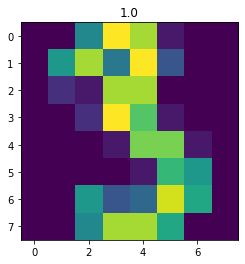

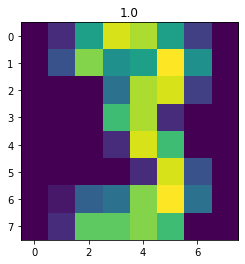

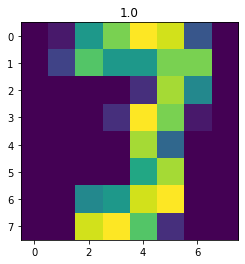

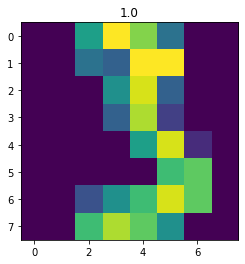

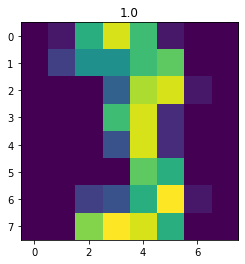

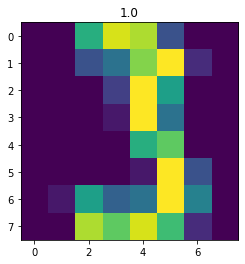

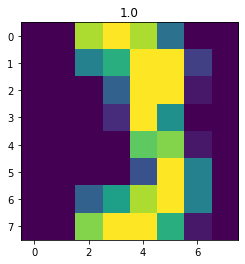

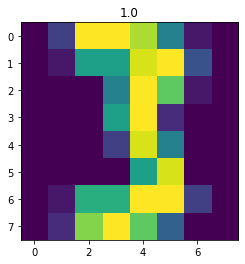

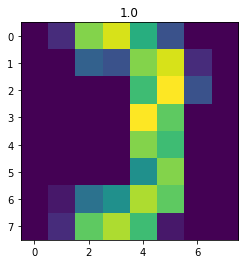

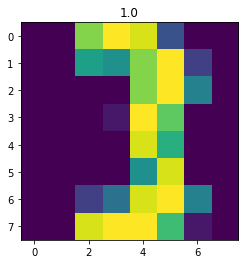

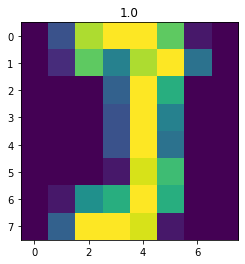

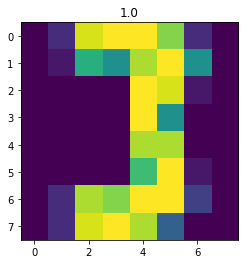

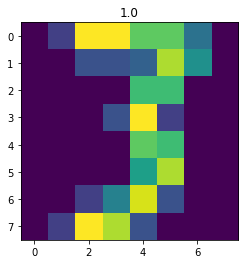

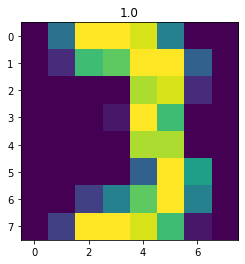

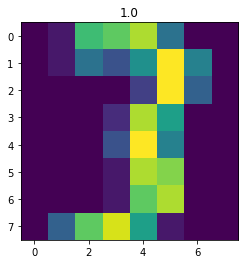

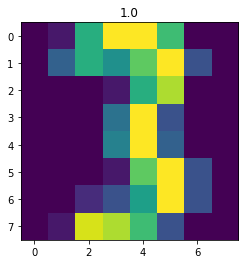

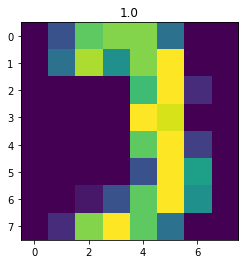

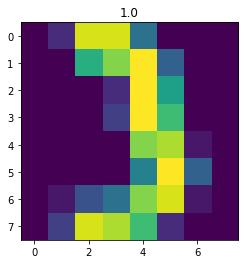

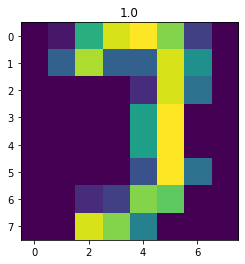

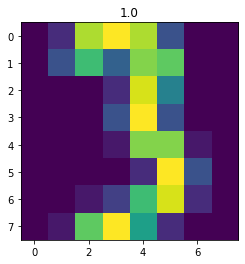

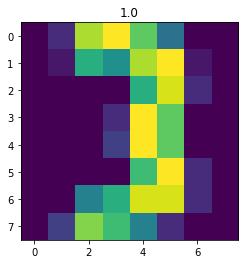

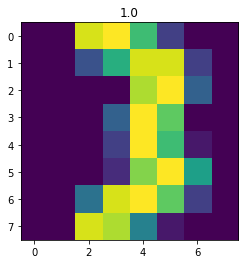

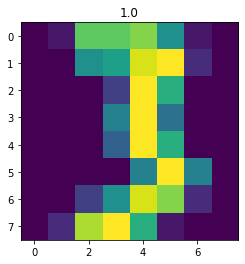

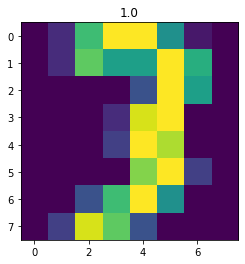

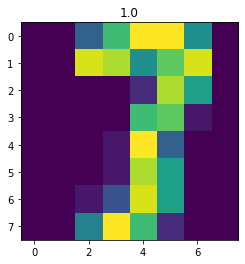

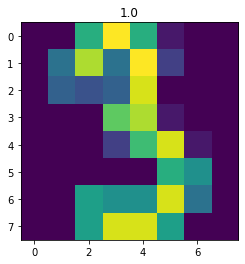

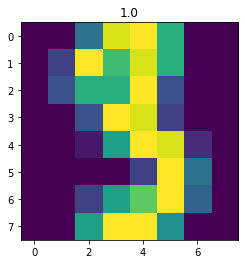

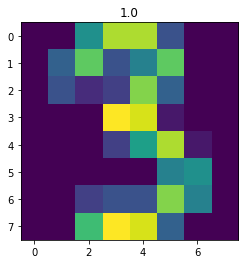

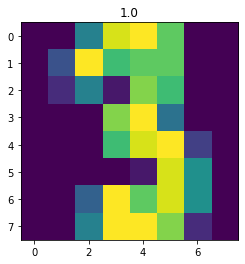

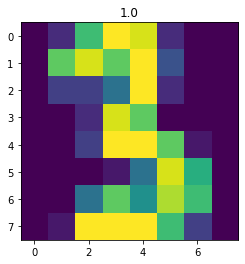

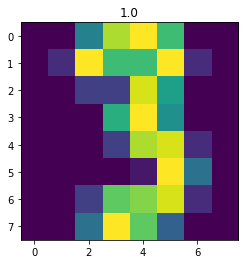

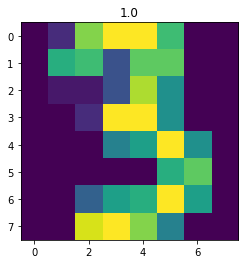

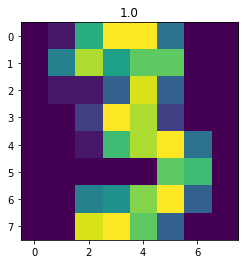

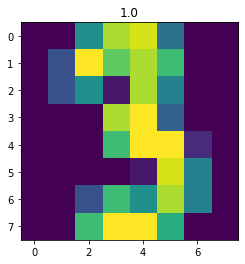

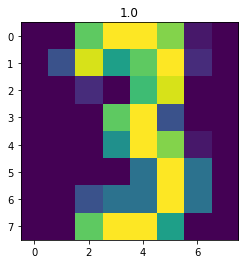

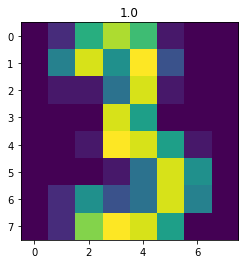

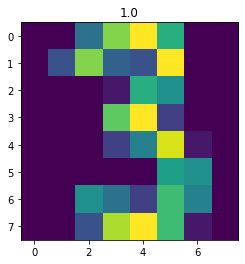

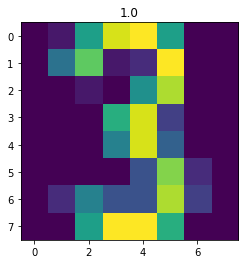

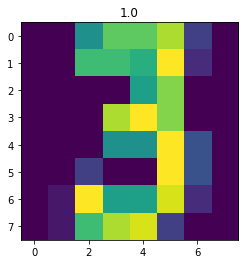

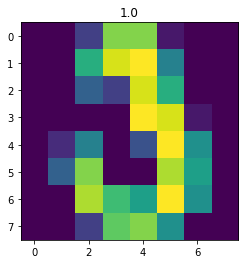

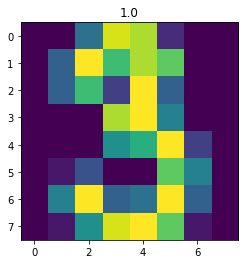

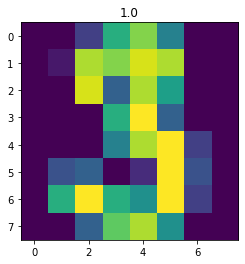

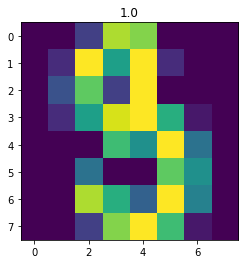

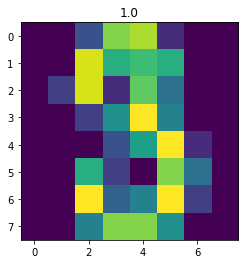

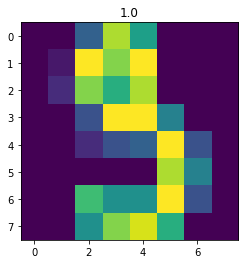

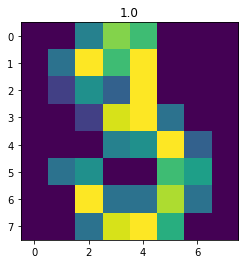

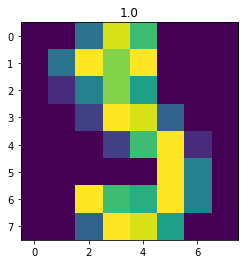

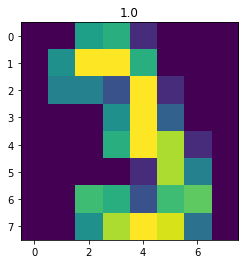

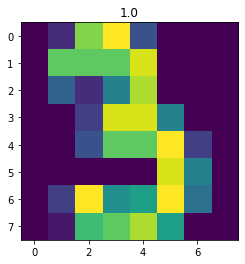

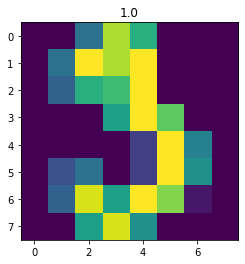

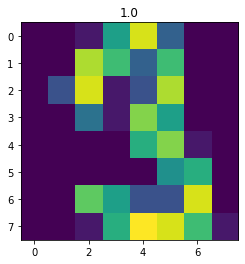

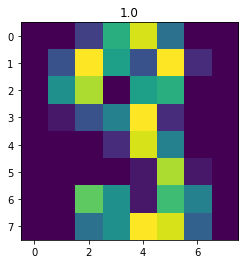

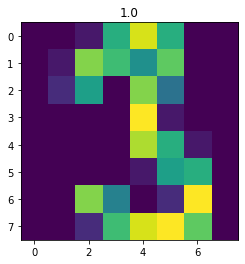

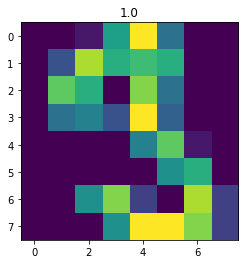

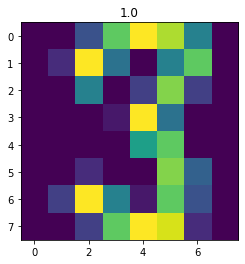

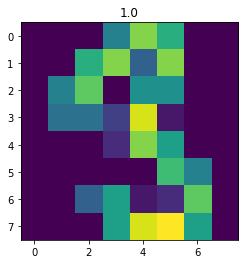

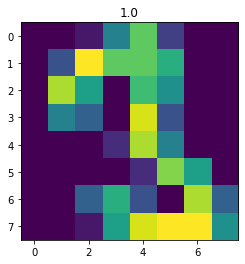

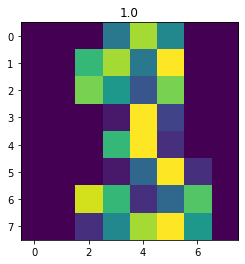

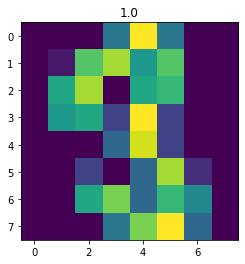

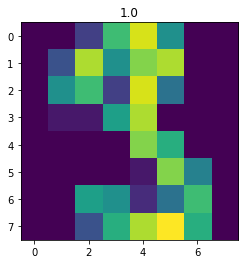

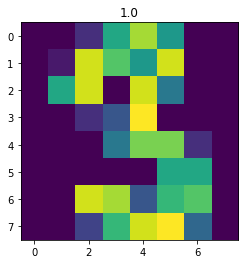

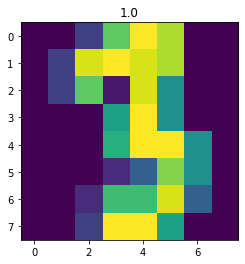

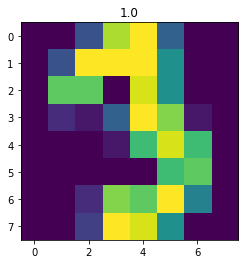

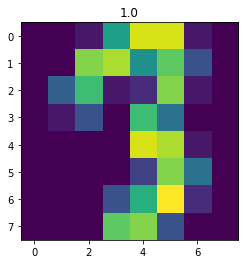

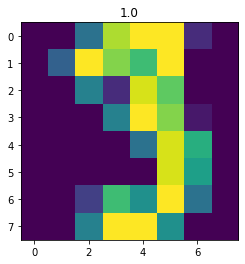

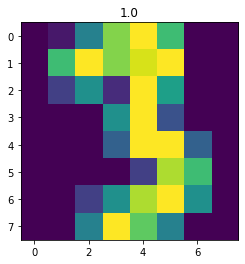

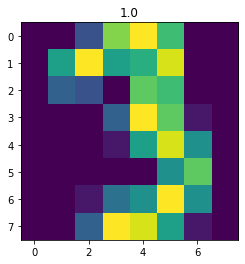

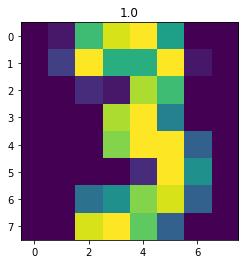

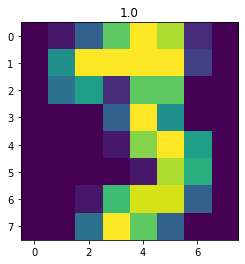

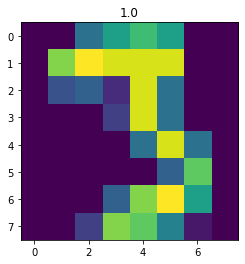

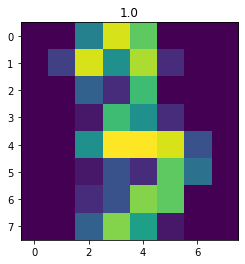

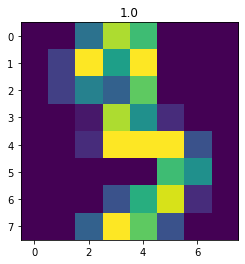

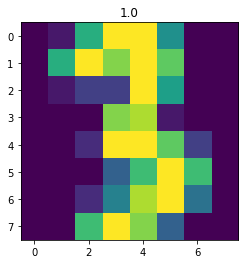

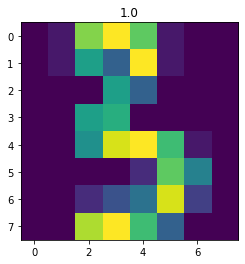

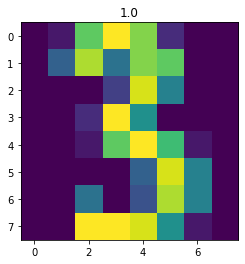

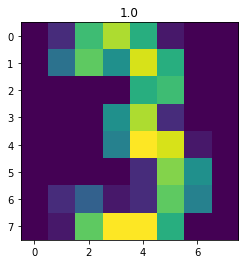

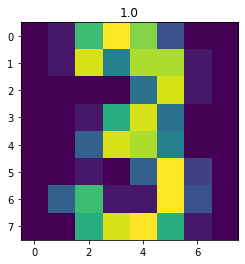

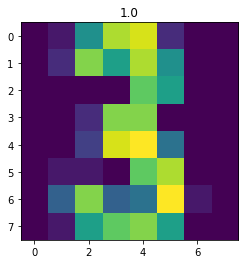

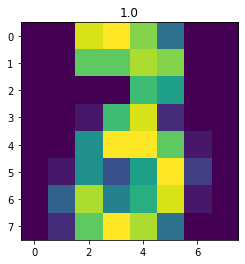

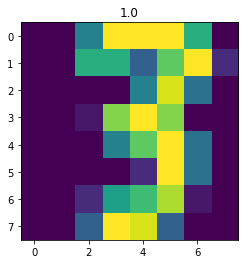

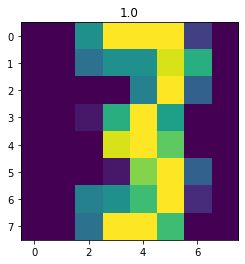

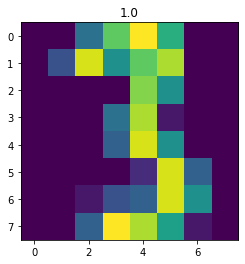

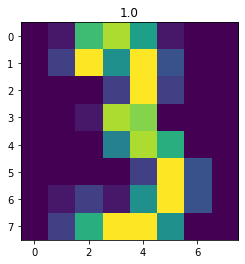

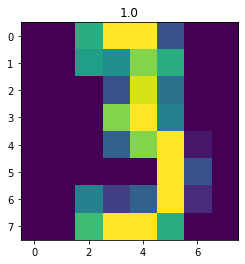

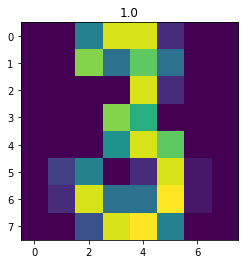

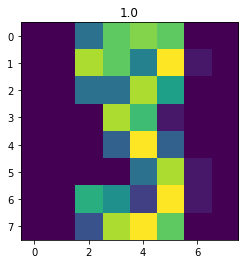

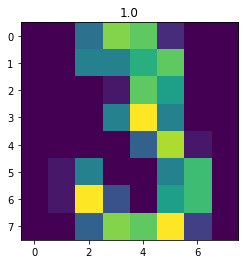

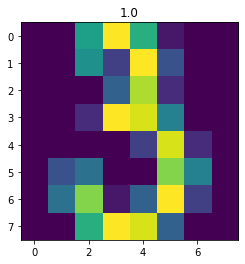

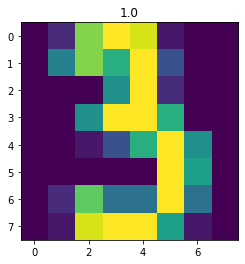

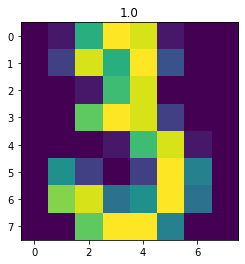

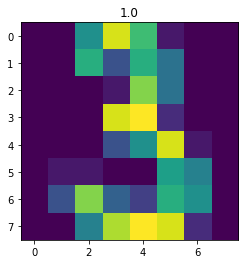

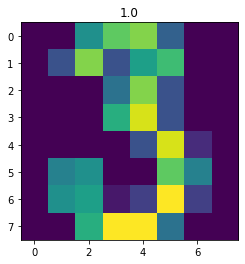

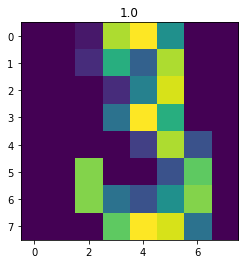

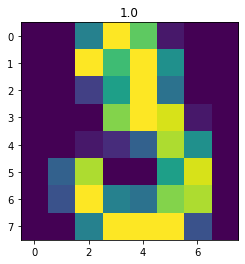

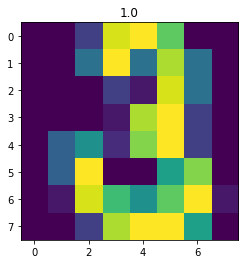

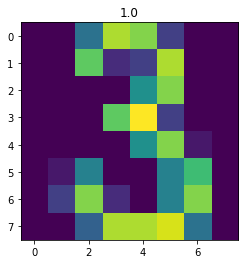

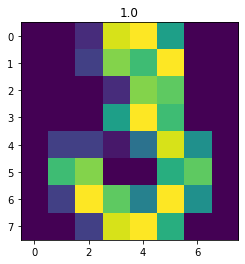

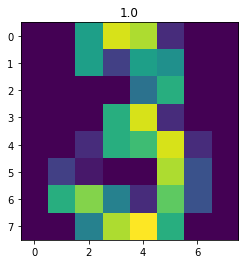

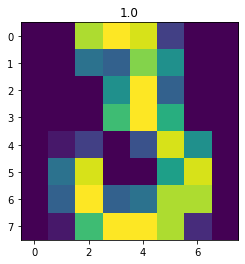

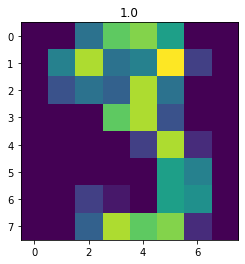

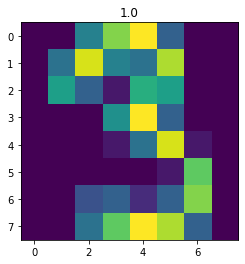

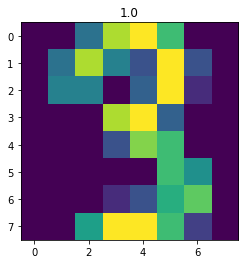

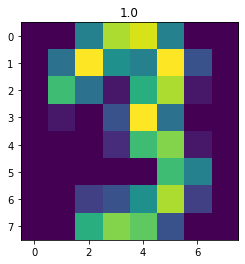

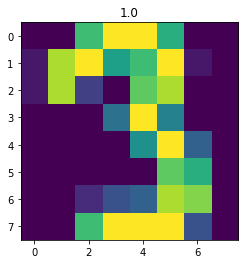

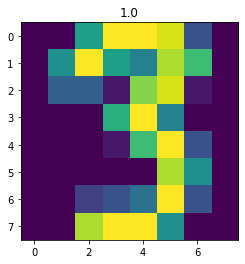

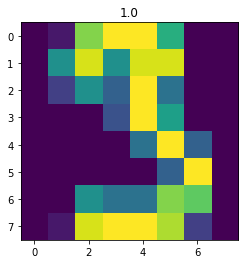

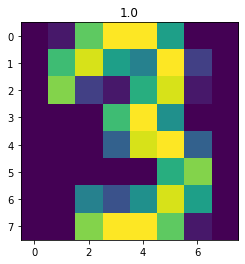

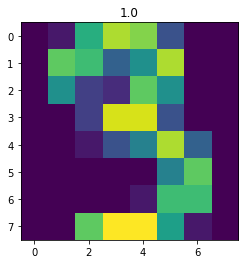

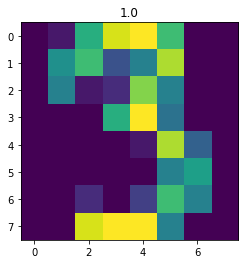

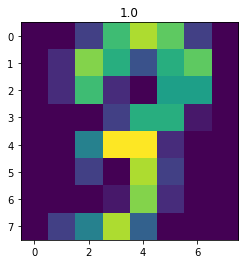

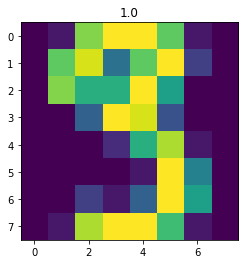

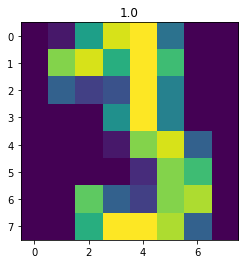

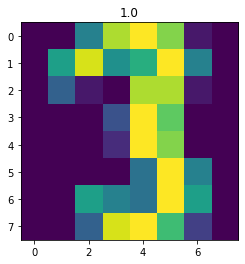

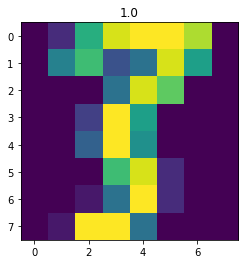

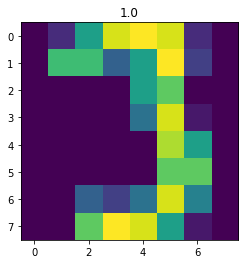

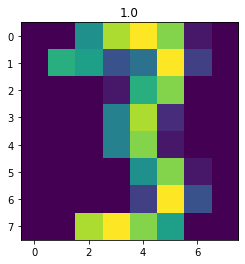

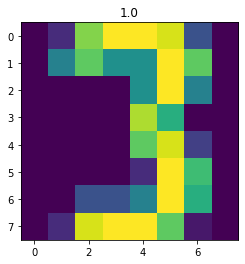

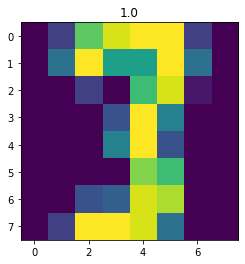

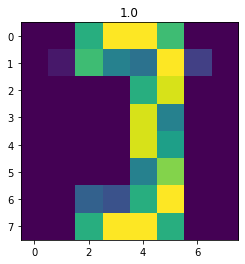

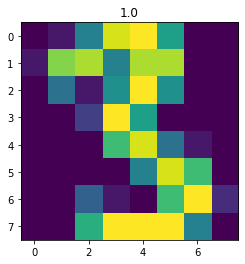

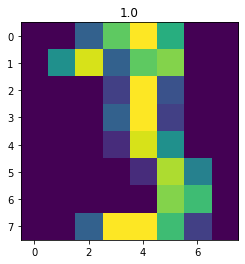

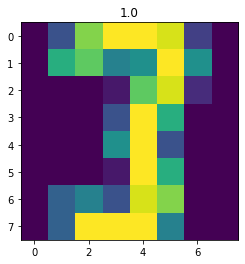

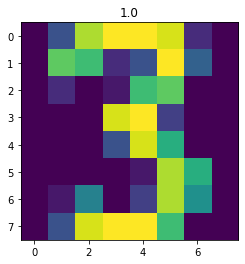

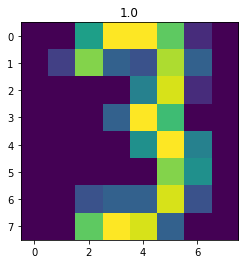

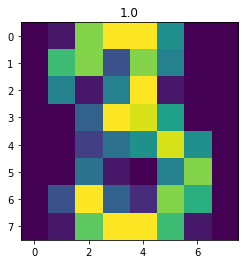

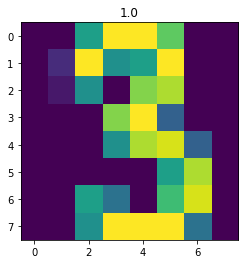

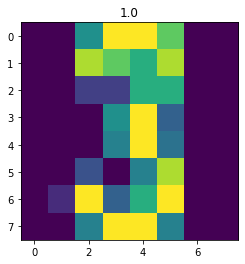

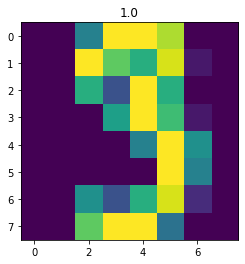

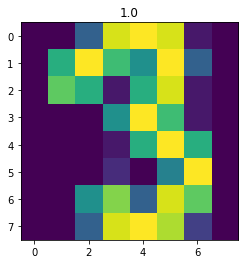

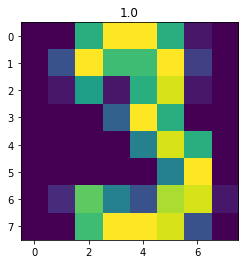

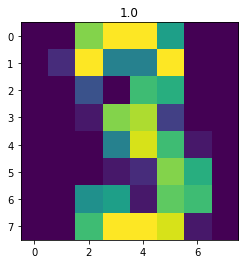

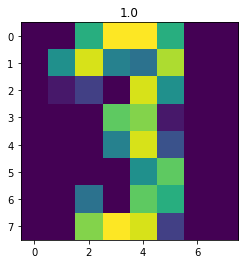

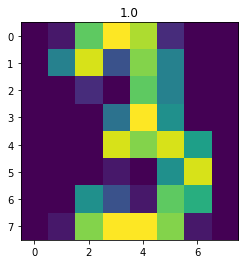

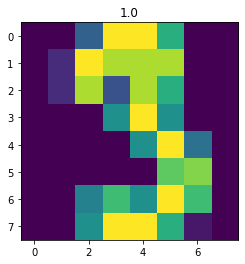

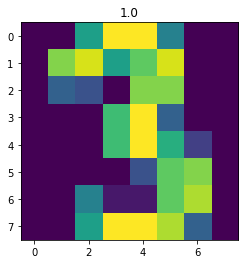

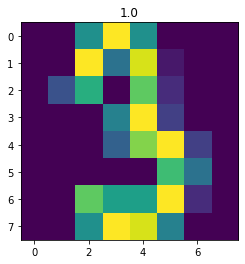

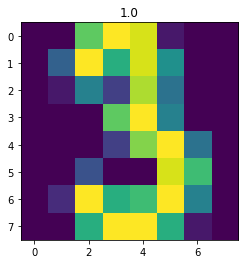

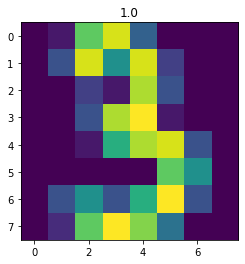

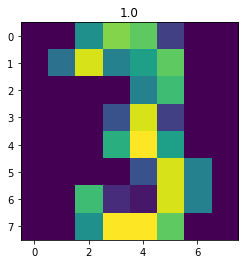

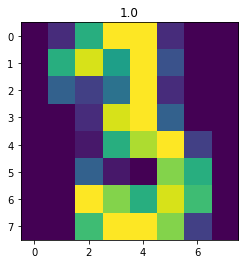

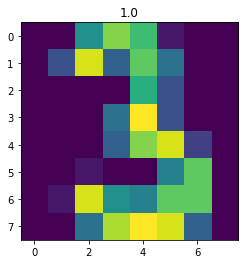

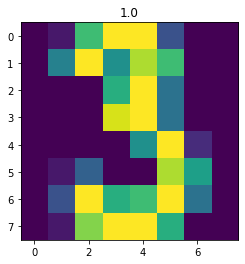

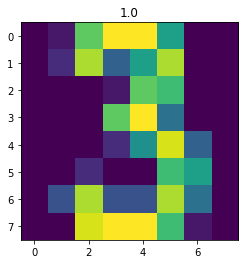

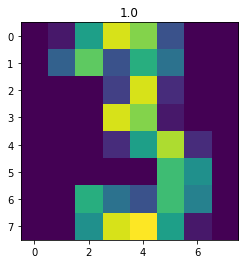

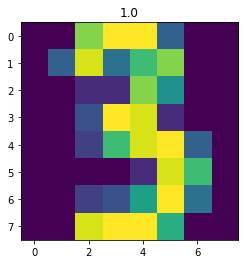

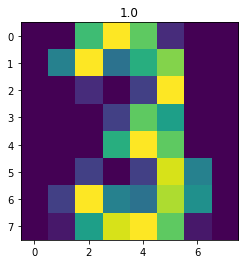

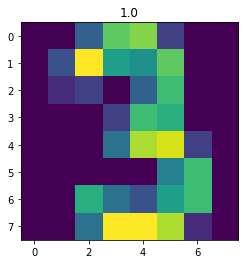

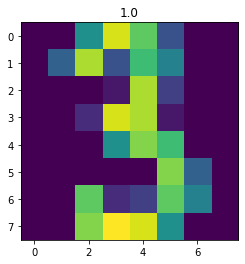

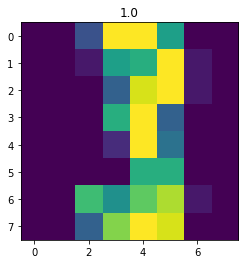

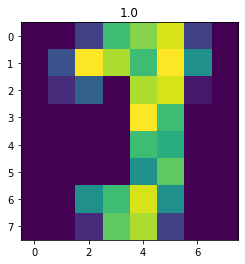

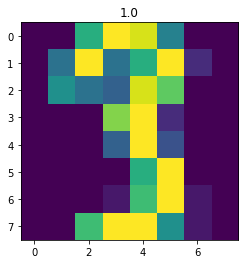

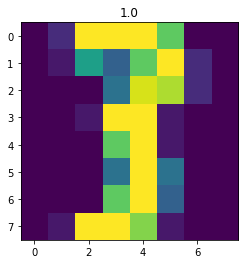

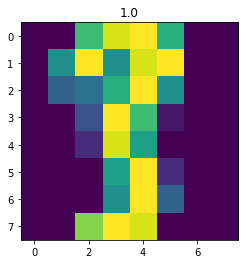

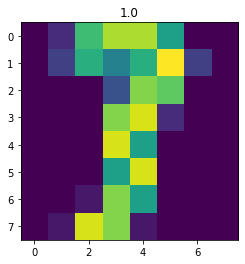

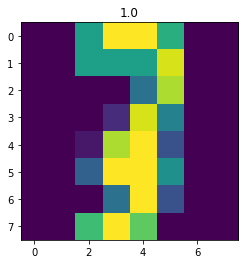

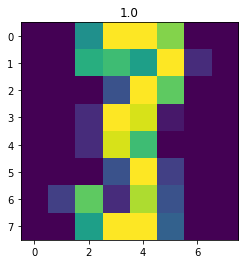

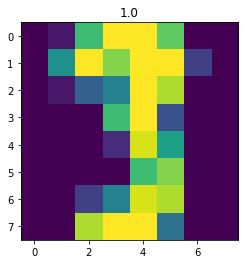

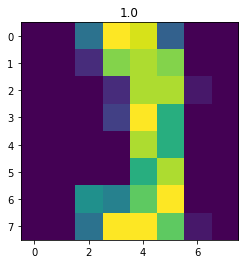

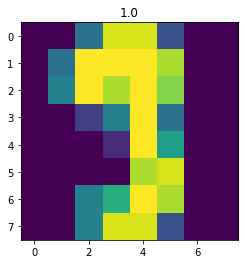

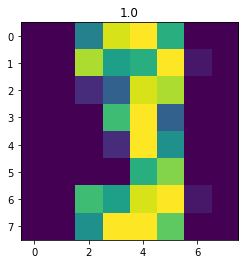

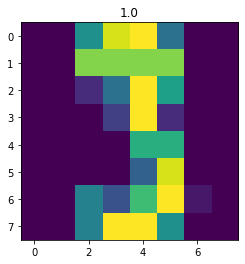

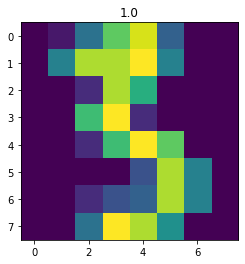

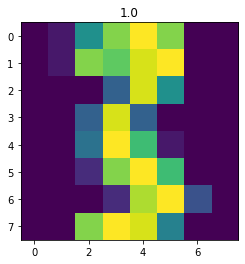

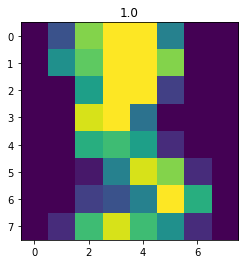

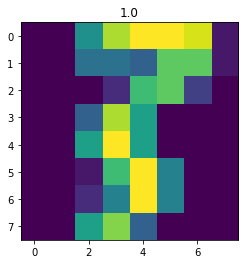

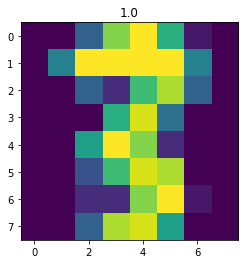

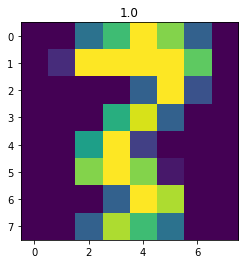

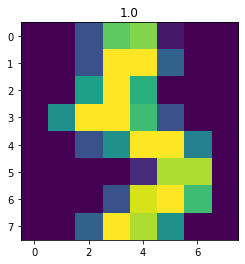

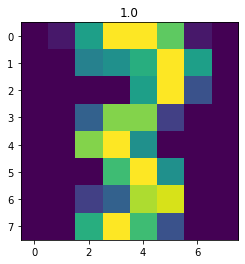

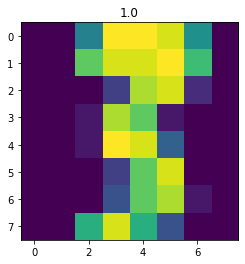

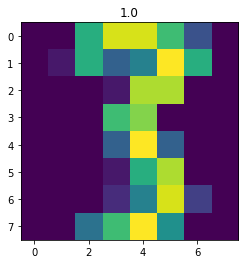

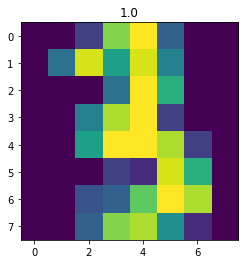

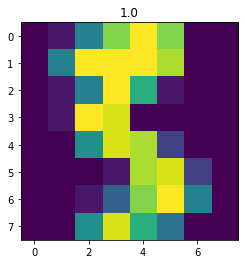

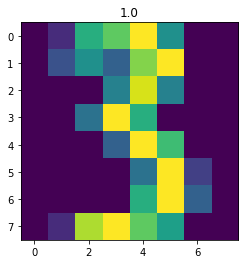

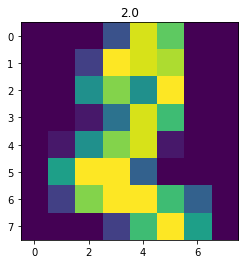

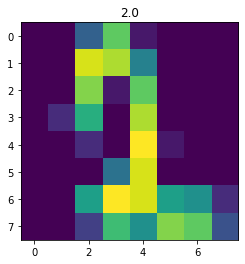

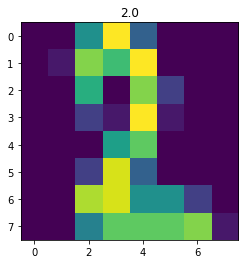

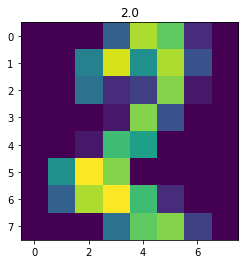

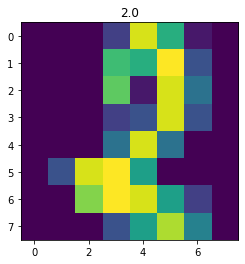

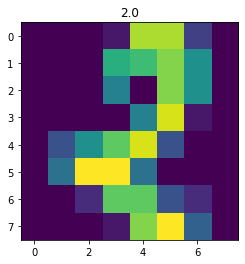

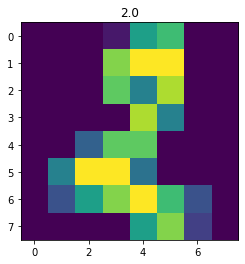

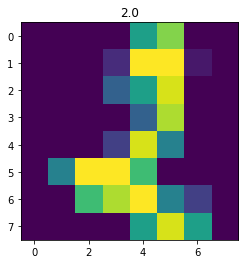

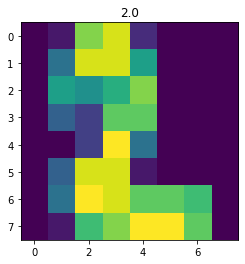

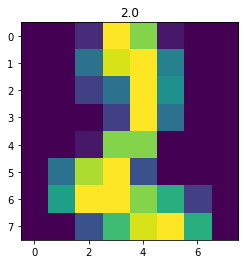

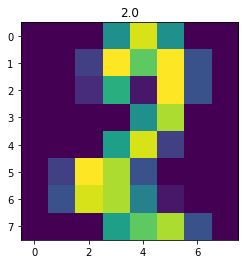

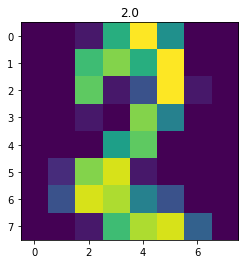

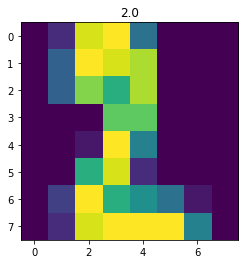

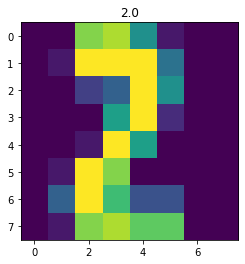

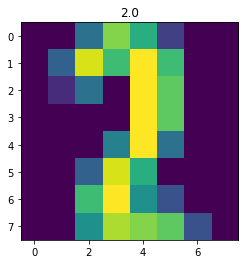

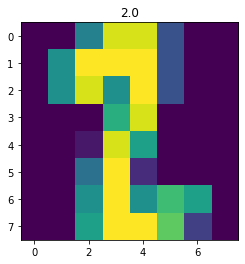

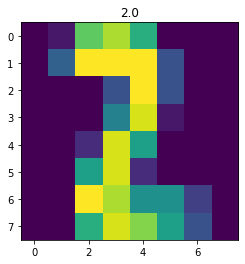

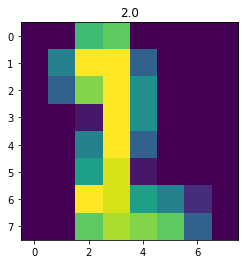

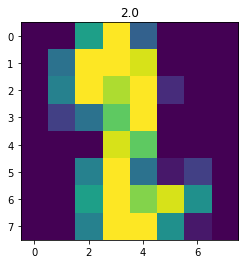

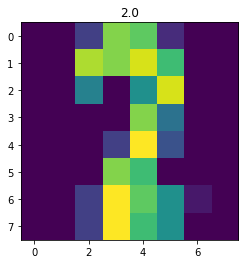

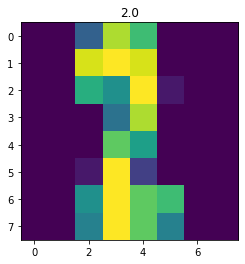

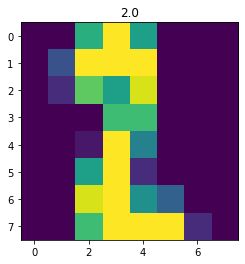

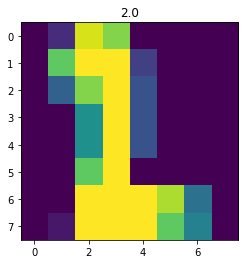

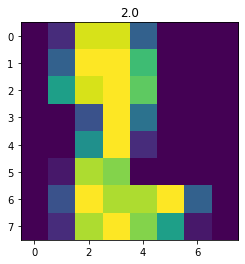

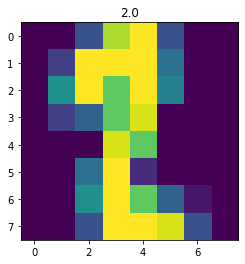

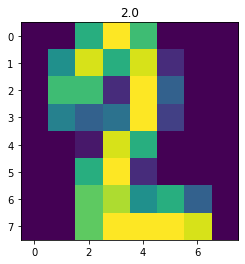

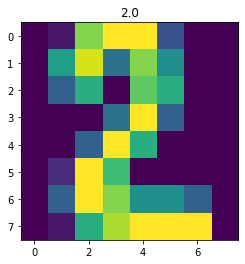

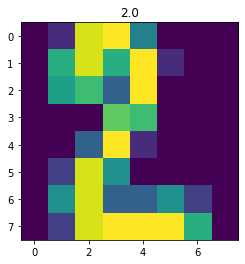

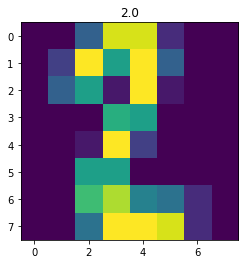

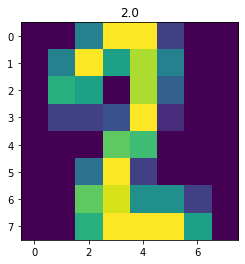

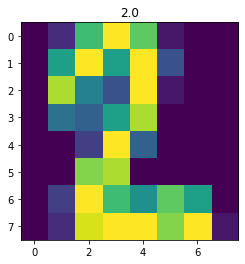

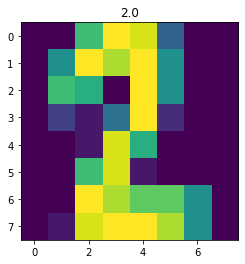

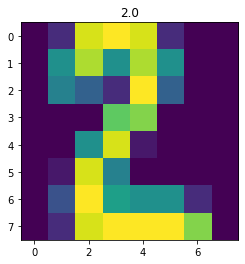

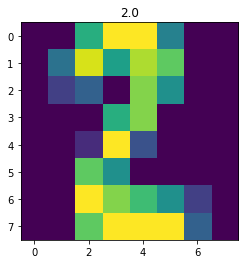

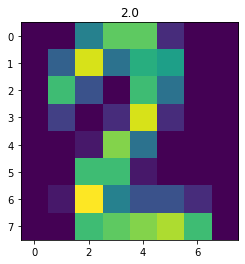

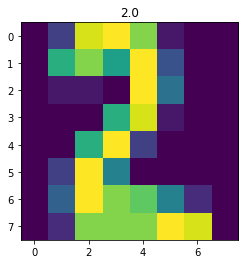

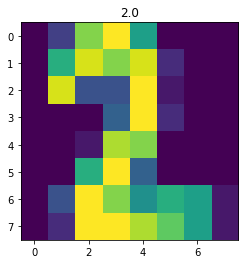

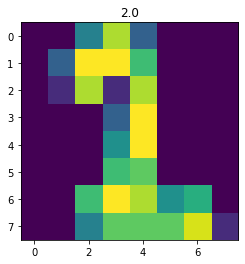

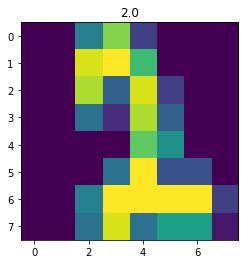

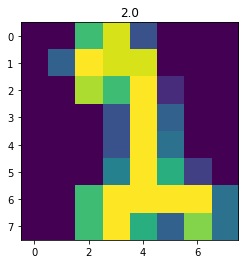

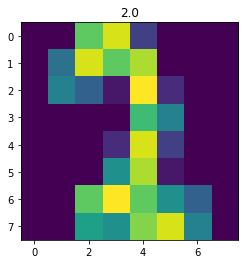

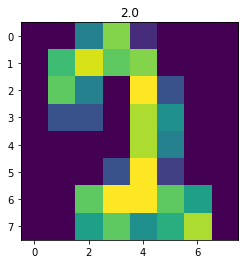

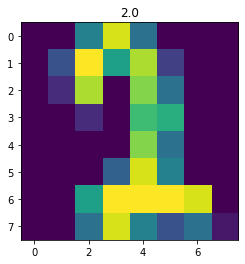

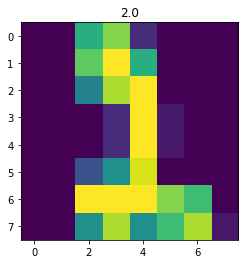

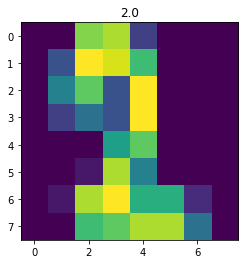

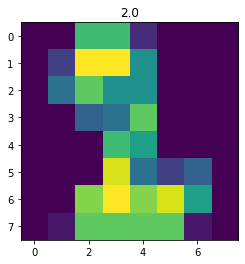

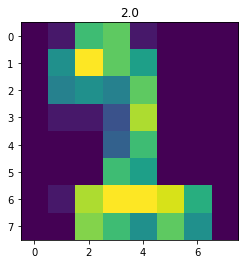

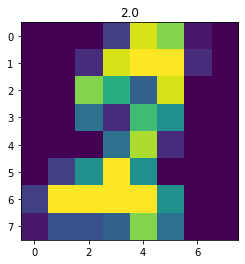

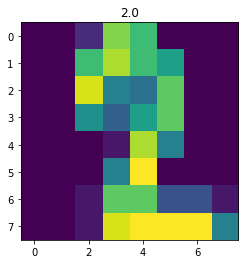

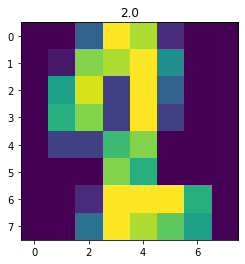

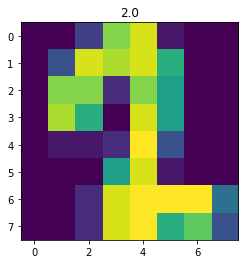

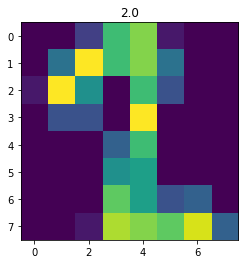

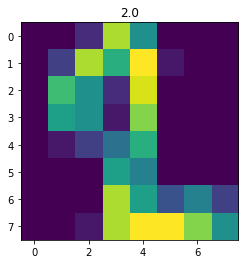

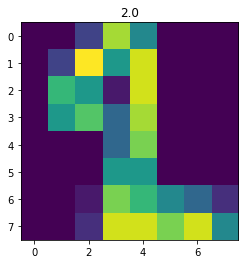

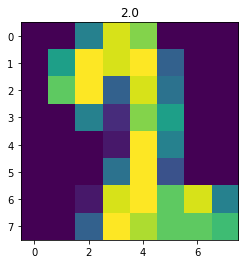

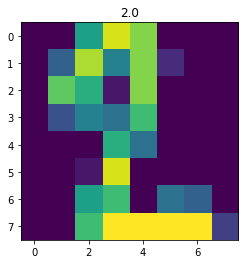

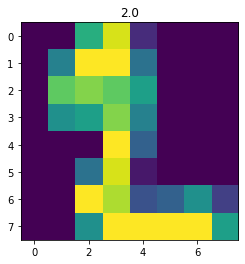

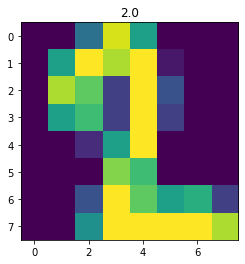

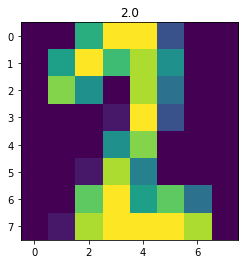

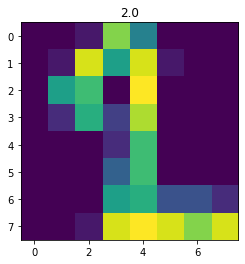

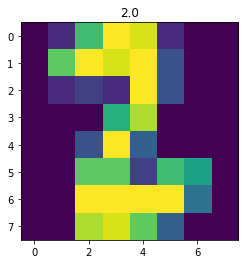

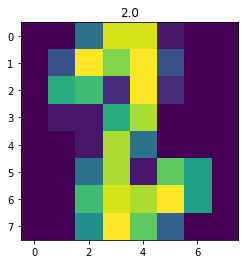

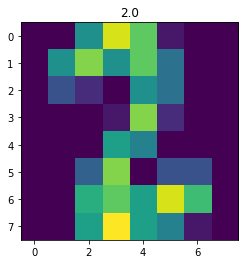

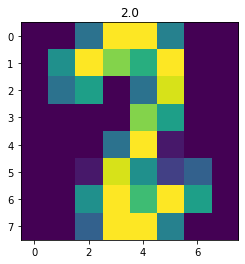

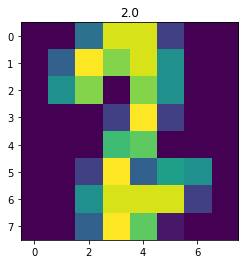

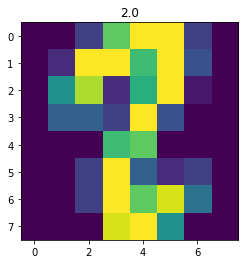

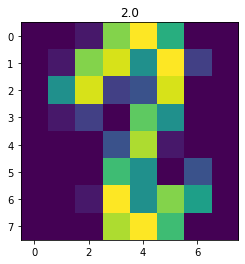

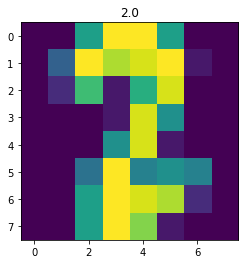

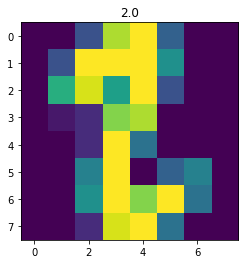

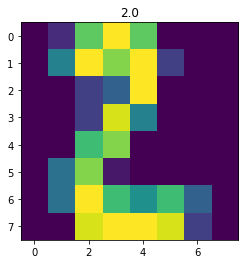

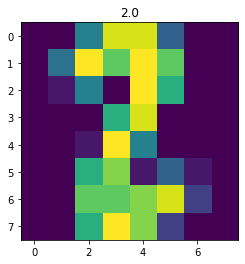

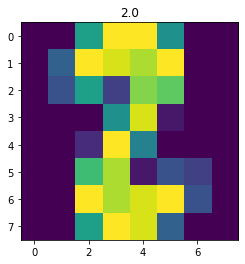

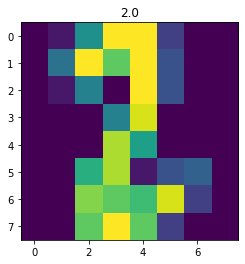

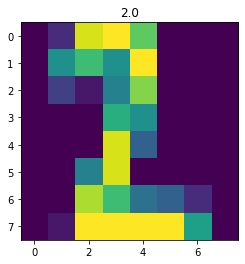

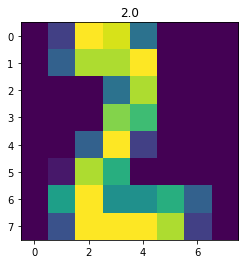

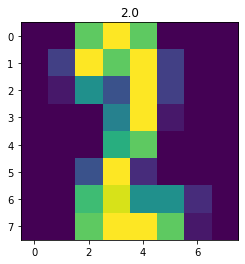

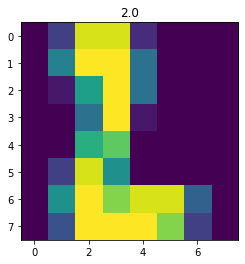

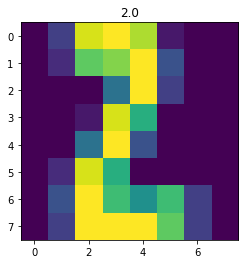

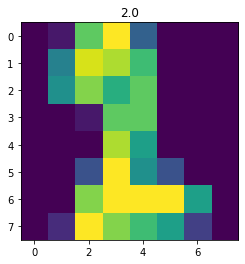

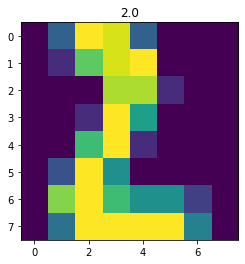

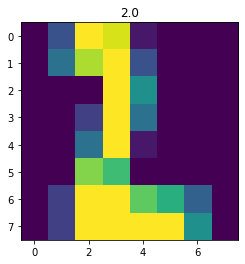

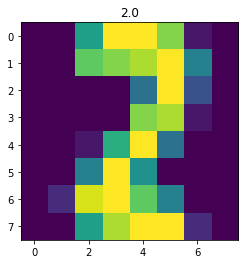

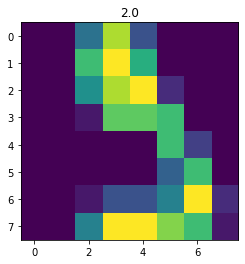

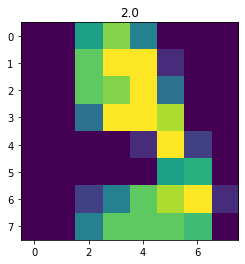

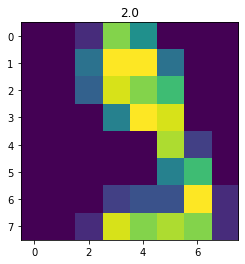

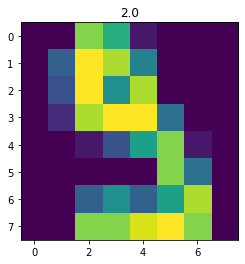

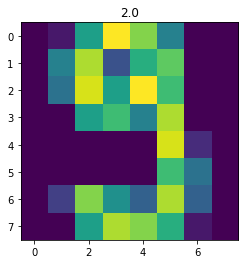

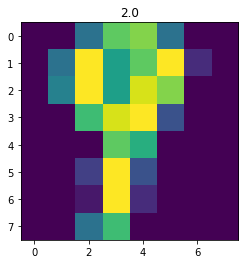

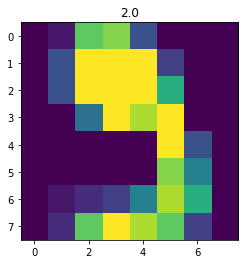

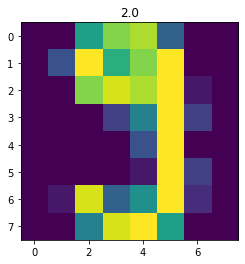

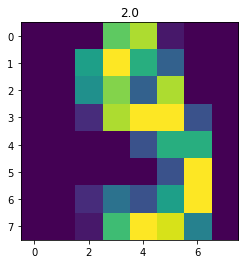

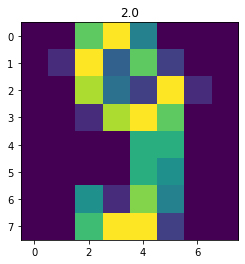

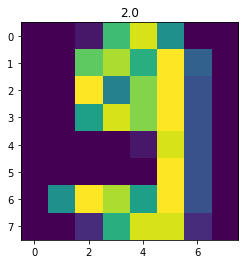

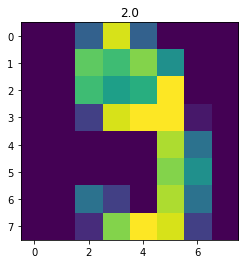

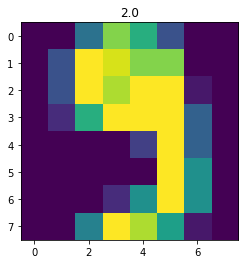

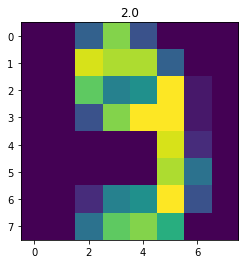

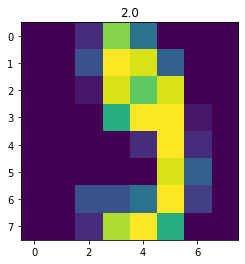

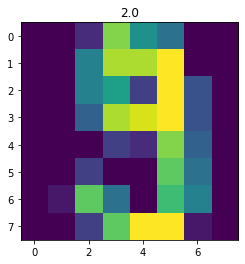

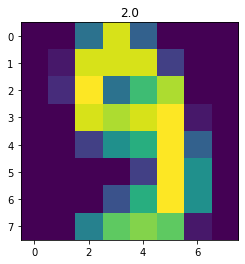

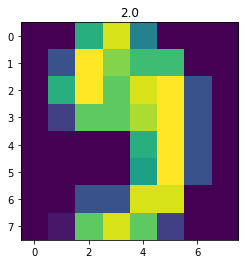

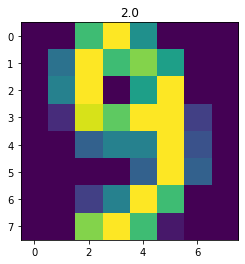

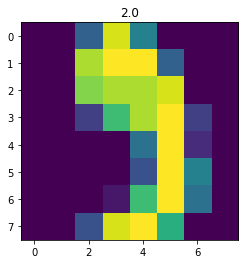

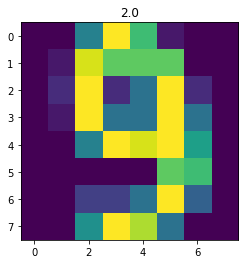

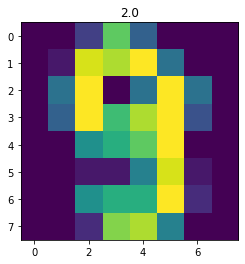

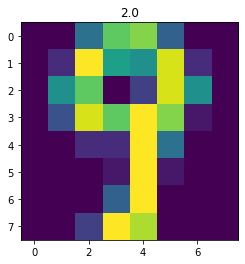

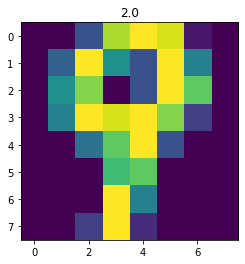

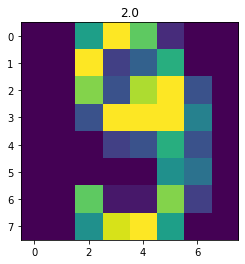

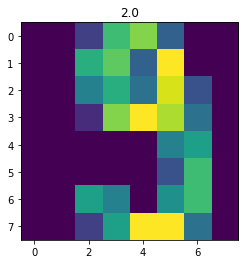

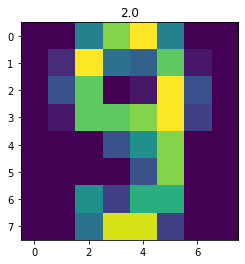

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [19]:
for i in range(pool.shape[0]):
    plt.figure()
    plt.imshow(pool[i].reshape(8,8))
    plt.title(str(trgt[i]))
    plt.show()

In [ ]:
#Pairs d'un côté, impairs de l'autre
#Labelliser des 3 et des 8
#Regarder si la frontière se fait autour des 3 et des 8 ou autours des "vrais" classes